In [69]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Generating data which is not linearly separable

In our experiments in lab 0, logistic regression achieved quite good classification results. This should not be viewed as a surprise since the sigmoid of affine transformed data was a good fit for the chosen posterior probability of data classes. Our experiments slightly digressed from ideal theoretical assumptions (our classes had different covariances) but results showed that this digression did not hurt the performance of our algorithm. Now we will make the things a little harder by instantiating the data with a more complex generative model.

Instructions:

- Write a subroutine `sample_gmm_2d(K, C, N)` which creates `K` random bivariate Gaussian distributions, and samples `N` data points from each of them. Unlike in `sample_gauss_2d`, here we need to assign class `c_i` to each bivariate distribution `G_i`, where c_i is randomly sampled from the set `{0, 1, ..., C-1}`. This way we get the data generated by mixtures of randomly chosen Gaussian distributions. The function should return a data matrix `X` and the groundtruth class matrix `Y`. The rows of both matrices correspond to sampled data points. The matrix `X` contains the data, while Y contains the class index of the generating distribution.
- The implementation of the subroutine first should create random distributions and assign them a random class from 0 to `C - 1`. Then, it must sample the required number of data points from each of the distributions and assign these data the corresponding class index.
- The subroutine should return the following data:

```
X  ... data in a matrix [K·N x 2 ]
Y_ ... class indices of data [K·N]
```

Run the subroutine `sample_gmm_2d` and test it by invoking drawing functions developed in lab exercise 0 (`graph_surface` and `graph_data`). Depending on the parameters and the state of the random number generator, your result could look similar to the figure below. Our parameters were: `K=4`, `C=2`, `N=30`.

-- image

When you are satisfied with the execution results, save the code in the file `data.py`. 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
X.shape (120, 2)
Y.shape (120,)


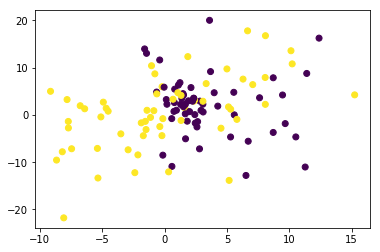

In [93]:
np.random.seed(100)

class Random2DGaussian():
    def __init__(self):
        # [ [minx, maxx], [miny, maxy] ]
        xy = np.array([[0, 10], [0, 10]])

        self.mean = [xy[i][0]+np.random.random_sample()*(xy[i][1]-xy[i][0]) for i in range(2)]
        D = np.diag((np.random.random_sample(2)*(xy[0][1]-xy[0][0], xy[1][1]-xy[1][0]))**2)
        angle = np.random.random_sample()*2*np.pi
        R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        self.sigma = np.dot(np.dot(np.transpose(R), D), R)
    
    def get_sample(self, n):
        return np.random.multivariate_normal(self.mean, self.sigma, n)


def sample_gmm_2d(K, C, N):
    '''
    K - number of distributions
    C - number of classes
    N - number of data points assigned to specific class
    '''
    distributions = []
    classes = []
    for i in range(K):
        distributions.append(Random2DGaussian())
        classes.append(np.random.randint(C))
    
    X = np.vstack([d.get_sample(N) for d in distributions])
    Y_ = np.hstack([[c]*N for c in classes])
    return X,Y_

X, Y = sample_gmm_2d(4, 2, 30)
print('X.shape', X.shape)
print('Y.shape', Y.shape)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()



# 2. Multi layer classification in Python

In this exercise you shall develop an algorithm for learning a probabilistic classification model with one hidden layer, by employing the negative log-likelihood loss and stochastic gradient descent. Your algorithm should be stored in the module `fcann2`. The organization of the module should follow the example set by the module logreg from the lab exercise 0. The module should contain the methods `fcann2_train` and `fcann2_classify`. The module should be tested on an artificial dataset containing 2D data of two classes sampled from a Gaussian mixtures of 6 components.

Depending on parameters and the seed of the random number generator, your result could look like in the figure below. Our hyper-parameters were: `K=6`, `C=2`, `N=10`, `param_niter=1e5`, `param_delta=0.05`, `param_lambda=1e-3` (regularization coefficient), hidden layer dimensionality: `5`.

-- image

When you are satisfied with the execution results, save the code in the file `fcann2.py`. 

# 3. Linear regression in Tensorflow

We illustrate a typical structure of a machine learning algorithm in Tensorflow on a complete example of the optimization procedure for estimating the parameters of a line `y = a * x + b` passing through points `(1,3)` and `(2,5)`. 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. definition of the computation graph
# data and parameters
X  = tf.placeholder(tf.float32, [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# affine regression model
Y = a * X + b

# quadratic loss
loss = (Y-Y_)**2

# optimization by gradient descent
trainer = tf.train.GradientDescentOptimizer(0.1)
train_op = trainer.minimize(loss)

## 2. parameter initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## 3. training
# let the games start!
for i in range(100):
  val_loss, _, val_a,val_b = sess.run(
      [loss, train_op, a,b], 
      feed_dict={X: [1,2], Y_: [3,5]})
  print(i,val_loss, val_a,val_b)

Assignments:

- Analyze the provided program and check the execution correctness.
- Modify the program so that a line is fit to an arbitrary number of points. Ensure that the magnitude of the gradients does not depend on the count of the data.
- [Express](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#processing_gradients_before_applying_them) the optimization step by calling methods `compute_gradients` and `apply_gradients`.
- Fetch and print the gradient values during optimization by evaluating (`run`) the gradients returned by `compute_gradients`. Take into account that `compute_gradients` returns a list of tuples (gradient, variable), while the method `run` receives a list of nodes in a single positional argument.
- Define analytical expression for the loss gradient w.r.t. parameters `a` and `b`. Define the nodes which calculate the gradients explicitly, and evaluate them by invoking the method `run`. Print out values of the gradients and make sure they are equal to the values determined by Tensorflow.
- Show that values of the gradients may be printed using the function [tf.Print](https://www.tensorflow.org/api_docs/python/tf/Print). 

When you are satisfied with the execution results, save the code in the file `fcann2.py`. 

# 4. Logistic regression in Tensorflow

In this assignment we shall express the logistic regression under Tensorflow. The source code will be only half as long as the corresponding "hand made" code from the lab 0. The exercise will demonstrate the following Tensorflow advantages: i) we don't need to derive gradients, and ii) the code may be executed on different processing platforms (CPU, GPU) without making substantial changes. These advantages will be crucial in cases of large models with hundres of millions of parameters (in smaller models, a CPU implementation may be faster due to expensive transfers from RAM to GPU).

In the introductory examples we have seen that Tensorflow programs often need to use two names for the same tensor. The first name references the node in the computation graph, whereas the second name references a value of that node for specific input data (eg. `loss` and `val_loss`, or a and val_a). To avoid the need for duplicated naming, the algorithm can be expressed as a class whose data members reference the graph nodes. This allows the client code to use the same names to refer to the specific tensor values. Following these guidelines, a class for logistic regression under Tensorflow could have the structure as follows. 

In [ ]:
class TFLogreg:
  def __init__(self, D, C, param_delta=0.5):
    """Arguments:
       - D: dimensions of each datapoint 
       - C: number of classes
       - param_delta: training step
    """

    # declare graph nodes for the data and parameters:
    # self.X, self.Yoh_, self.W, self.b
    # ...

    # formulate the model: calculate self.probs
    #   use tf.matmul, tf.nn.softmax
    # ...

    # formulate the loss: self.loss
    #   use tf.log, tf.reduce_sum, tf.reduce_mean
    # ...

    # formulate the training operation: self.train_step
    #   use tf.train.GradientDescentOptimizer,
    #       tf.train.GradientDescentOptimizer.minimize
    # ...

    # instantiate the execution context: self.session
    #   use tf.Session
    # ...

  def train(self, X, Yoh_, param_niter):
    """Arguments:
       - X: actual datapoints [NxD]
       - Yoh_: one-hot encoded labels [NxC]
       - param_niter: number of iterations
    """
    # parameter intiailization
    #   use tf.global_variables_initializer
    # ...

    # optimization loop
    #   use tf.Session.run
    # ...

  def eval(self, X):
    """Arguments:
       - X: actual datapoints [NxD]
       Returns: predicted class probabilites [NxC]
    """
    #   use tf.Session.run

Notice that unlike the previous exercise the true labels of the training data are now called `Yoh_` instead of `Y_`. This is due to the fact that, in Tensorflow, the cross entropy loss is more easily expressed by organizing the labels in a matrix n which the rows correspond to data points while the columns correspond to class labels (this is also known as one-hot notation). If a data point x_i matches the class `c_j`, then `Yoh_[i,j]=1` and `Yoh_[i,k]=0` for all `k!=j` ("one hot"). In former mathematical discussion, data labels organized in such manner were referenced by the matrix $Y′$

The structure of a test program should be very similar to the test programs from the previous exercise: 

In [ ]:
if __name__ == "__main__":
  # initialize the random number generator
  np.random.seed(100)
  tf.set_random_seed(100)

  # instantiate the data X and the labels Yoh_

  # build the graph:
  tflr = TFLogreg(X.shape[1], Yoh_.shape[1], 0.5

  # perform the training with given hyper-parameters:
  tflr.train(X, Yoh_, 1000)

  # predict probabilities of the data points
  probs = tflr.eval(X)

  # print performance (per-class precision and recall)

  # draw results, decision surface

Assignments:

- Complete the implementation of the class `TFLogreg` and check whether your program achieves the same results as the corresponding programs from lab 0.
- Add regularization in a way that you form the loss as a sum of cross entropy and the L2 norm of the vectorized weight matrix multiplied with a hyperparameter `param_lambda`. Test the effect of regularization to the shape of the decision surface.
- Experiment with different values of hyperparameters. Find combinations of hyperparameters for which your program is unable to find a satisfcatory solution and try to explain what is happening. 

When you are satisfied with the execution results, save the code in the file `tf_logreg.py`. 

# 5. Configurable deep models in Tensorflow

Our next task is to expand the Tensorflow implementation of logistic regression in a way to enable simple creation of configurable fully connected classification models. Your solution should be encapsulated in the class `TFDeep` which should have the same interface as the class `TFLogreg`. The `TFDeep` constructor receives the configuration hyperparameter in the form of a list of layer dimensionalities. The element at index 0 defines the dimensionality of the data. Elements at indices `1` to `n-2` (if any) define the number of activations in hidden layers. The last number in the configuration list (the element at index `n-1`) corresponds to the number of classes (the model is supposed to perform the classification).

For example, a configuration `[2,3]` gives rise to multi-class logistic regression of two dimensional data into three classes. The configuration `[2,5,2]` specifies a model with one hidden layer `h` which contains `5` activations:

```python
h = f (X * W_1 + b_1)
probs = softmax(h * W_2 + b_2) 
```

In this example, the dimensions of graph nodes should be as follows (question marks stand for the unknown cardinality of the data set we apply the model to):

```
  X     ... [?,2]
  W_1   ... [2,5]
  b_1   ... [1,5]
  h_1   ... [?,5]
  W_2   ... [5,3]
  b_2   ... [1,3]
  probs ... [?,3]
```

Implementation of the class `TFDeep` should be very similar to what we had for the `TFLogreg` class. Most of the work will be in the constructor because now the graph construction depends on the configuration hyperparameter. Since the number of hidden layers may differ, the weight matrices and bias vectors should be placed in lists (let's call them `self.W` and `self.b`). The same goes for matrices of hidden layers which can be stored in the list `self.h`. Parameter dimensions can be defined within a loop through the configuration list. For better readability of the source code, we advise to factor the formulation of the model into a separate function. Hidden layer nonlinearities can be defined using TensorFlow's functions `tf.ReLU`, `tf.sigmoid` or `tf.tanh`.

Assignments:

- Implement the class `TFDeep` and try out configuration `[2,3]` on the same data as in the former assignment (the test code should be very similar). Make sure the results are the same as before.
- Make sure that all model parameters are given suitable symbolic names (if necessary, help yourself with the [documentation](https://www.tensorflow.org/api_docs/python/tf/Variable)). Write a method `count_params` which prints out symbolic names of all trainable parameters by traversing the return value of the function `tf.trainable_variables`. Print the total number of model parameters (e.g. for configuration `[2,3]` the result should be `9`).
- Try out your code on data returned by calling `data.sample_gmm_2d(4, 2, 40)` and `data.sample_gmm_2d(6, 2, 10)`, using configurations `[2,2]`, `[2,10,2]` and `[2,10,10,2]`. Print accuracy, recall, precision and average precision. Display the classification results and observe the decision surface. If there is no convergence, consider changing the hyperparameters.
- Compare the results obtained with the hidden activation function set to `ReLU` and the sigmoid function. For small problems, sigmoid may achieve better results than `ReLU` due to continuity. The main advantage of the `ReLU` is that it doesn't saturate, so there are no vanishing gradients in deeper models. 

Based on parameters and the state of the random number generator, your result could be similar to the animation below (our hyperparameters were: `K=6`, `C=2`, `N=10`, `param_niter=1e4`, `param_delta=0.1`, `param_lambda=1e-4` (regularization coefficient), `config=[2,10,10,2]`, `ReLU`).

-- image

When you are satisfied with the execution results, save the code in the `file tf_logreg.py`. 

# 6. Comparison to a kernel SVM

Recall the properties of the kernel SVM (model, loss, optimization) and read the documentation od the module `svm` from the library `scikit-learn`. Design the class KSVMWrap as a thin wrapper around the module `sklearn.svm` which you are going to be apply to the same two-dimensional data as before. Considering the spmlicity of our wrapper, the training can be done from the constructor, while class predictions, classification scores (required for average precision) and support vectors can be fetched in methods. Make the interface of the class as follows:

```python
Metode:
  __init__(self, X, Y_, param_svm_c=1, param_svm_gamma='auto'):
    Constructs the wrapper and trains the RBF SVM classifier
    X,Y_:            data and indices of correct data classes
    param_svm_c:     relative contribution of the data cost
    param_svm_gamma:  RBF kernel width

  predict(self, X):
    Predicts and returns the class indices of data X

  get_scores(self, X):
    Returns the classification scores of the data
    (you will need this to calculate average precision).

  suport:
    Indices of data chosen as support vectors
```

Assignments:

- Modify the function `data.graph.data` by introducing the argument `special`. The argument `special` assigns a list of data indices which are to be emphasized by doubling the size of their symbols.
- Test your class on the data from two classes sampled from mixtures of Gaussian distributions. As usual, display the standard performance metrics (accuracy, recall, precision, average precision).
- Compare the model performance implemented by classes `TFDeep` and `KSVMWrap` on a larger number of random data sets. What are the pros and cons of their loss functions? Which of the two guarantees a better performance? Which of the two can take a larger number of parameters? Which of the two would be more suitable for 2D data sampled from Gaussian mixtures?
- Plot the decision surface and classification results of RBF SVM. Make us of the argument `special` of the function `data.graph.data` to emphasize the display of support vectors. Based on the parameters and the random number generator, your results could resemble the following animation. (our hyperparameters were: `K=6`, `C=2`, `N=10`, `param_svm_c=1`, `param_svm_gamma='auto'`). 

-- image

When you are satisfied with the execution results, save the code in the file `tf_logreg.py`. 

# 7. Case study: MNIST

So far, the trained models haven't been evaluated on a separate test set. Such experiments can not provide an estimate of the generalization performance. They are therefore appropriate only in early experiments where we test whether a model has enough capacity for the given task.

In this exercise we shall explore generalization performance on real data. The MNIST dataset is a collection of hand-written images of digits from 0 to 9. Each digit is represented by an image of 28x28 pixels. MNIST contains 50000 training images and 10000 testing images. The dataset can be (down)loaded with the following code:

```python
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.app.flags.DEFINE_string('data_dir', 
  '/tmp/data/', 'Directory for storing data')
mnist = input_data.read_data_sets(
  tf.app.flags.FLAGS.data_dir, one_hot=True)
```

Now, the sets of images and class indices are represented by numpy matrices `train.images`, `train.labels`, `test.images` i `test.labels` which are available as attributes of the mnist object. We can find the dimension of the data by querying the shape of those matrices.

```
N=mnist.train.images.shape[0]
D=mnist.train.images.shape[1]
C=mnist.train.labels.shape[1]
```

As before, the datapoints are stored as rows of the data matrix. If we want to display them, we must reshape them to the original resolution and pass them to the plt.imshow function with arguments `cmap = plt.get_cmap('gray')`, `vmin = 0` to `vmax = 1.`

Assignments:

- Train a `TFDeep` model with configuration `[784,10]` on MNIST. Plot and comment the weight matrices for each digit separately
- Train the models with configurations `[784,10]`, `[784,100,10]`, `[784,100,100,10]` and `[784,100,100,100,10]` and compare their performance and confusion matrices on train and test sets. If you don't have a functioning GPU, you don't need to run experiments on the last two configurations. Pay attention that deeper models require more iterations and a smaller learning rate. For the most successfull model, plot images which contribute most to the loss function.
- Study the effect of regularization to the performance of deep models on the train and the test subsets.
- Randomly separate 1/5 of the training data into the validation set. Evaluate validation performance after each epoch and return the model with the best validation performance (early stopping). Quantify the effect of this procedure to the final loss and to the generalization.
- Implement stohastic gradient descent with training on mini-batches. At the beginning of each epoch, shuffle the data and partition it into `sz_batch` mini-batches. Then perform one training step for each mini-batch. Store the code into the `train_mb` method of the class `TFDeep`. Estimate the effect of the convergence quality and achieved performance for the most successful configuration of the previous assignment.
- Change the optimizer to `tf.train.AdamOptimizer` with fixed learning rate of `1e-4`. Estimate the effect of this change to the quality of convergene and achieved performance.
- Try ADAM with a variable learning rate. Make use of the function [tf.train.exponential_decay](https://www.tensorflow.org/api_docs/python/tf/train/exponential_decay). Leave the initial learning rate as before, and change the other hyperparameters to `decay_rate=1-1e-4` i `decay_stepsi=1`.
- Train a linear and a kernel SVM classifier using the module `sklearn.svm`. Use the one vs one SVM variant to allow the classification of multiclass data. The experiment might require some patience since the training and evaluation may takes up to more than half an hour. Compare the achieved performance with the performance of deep models. 

When you are satisfied with the execution results, save the code in the file `mnist_shootout.py`.


# 8. Batch normalization (extra credit)

Study the batch normalization [technique](https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization) for fully connected models. Expand the deep classifier by fitting a batchnorm layer after the affine transformations in each hidden layer. Be careful to allow the change of batch-normalization parameters [only](https://www.alexirpan.com/2017/04/26/perils-batch-norm.html) during [training](http://r2rt.com/implementing-batch-normalization-in-tensorflow.html). Compare the performance to what you have obtained with the basic deep model. 